In [1]:
from IPython.display import HTML

In [2]:
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%load_ext autoreload
%autoreload 2
import bgc_md2.helper as h

In [4]:
model_inspection = h.MvarSetInspectionBox()

In [5]:
from bgc_md2.resolve.mvars import CompartmentalMatrix, StateVariableTuple, VegetationCarbonInputPartitioningTuple,VegetationCarbonInputTuple
from ComputabilityGraphs import CMTVS

{InternalFluxesBySymbol,OutFluxesBySymbol,SmoothReservoirModel,InFluxesBySymbol,NumericCompartmentalMatrixFunc,VegetationCarbonInputTuple,NumericStartValueArray,AggregatedVegetationCarbon}
{InternalFluxesBySymbol,OutFluxesBySymbol,InputTuple,CompartmentalMatrix,AggregatedVegetationCarbon,VegetationCarbonInputScalar,AggregatedVegetationCarbonOutFlux,VegetationCarbonInternalFluxesBySymbol,SmoothReservoirModel,VegetationCarbonInputPartitioningTuple,VegetationCarbonOutFluxesBySymbol,NumericStartValueDict,NumericCompartmentalMatrixFunc,InFluxesBySymbol,OutputTuple,VegetationCarbonInputTuple,AggregatedVegetationCarbonInFlux,NumericParameterizedSmoothReservoirModel,NumericStartValueArray,VegetationCarbonInFluxesBySymbol,VegetationCarbonCompartmentalMatrix}
{InternalFluxesBySymbol,OutFluxesBySymbol,InputTuple,CompartmentalMatrix,AggregatedVegetationCarbon,VegetationCarbonInputScalar,AggregatedVegetationCarbonOutFlux,VegetationCarbonInternalFluxesBySymbol,SmoothReservoirModel,VegetationCarbonIn

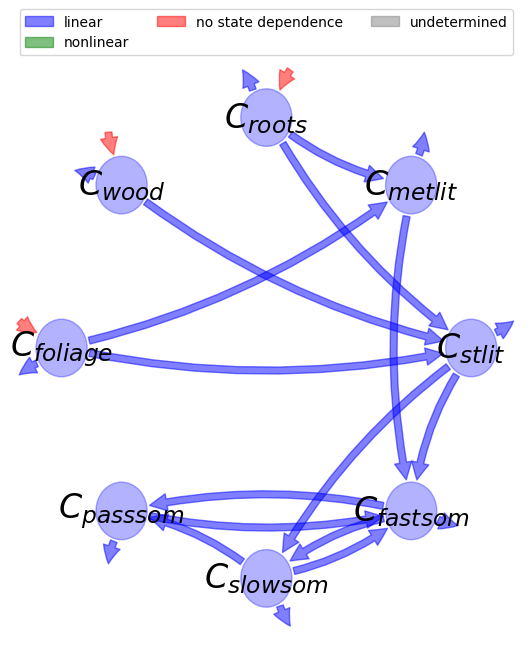

In [6]:
from bgc_md2.models.TECOmm.source  import mvs as mvs_mm

h.compartmental_graph(mvs_mm)

In [7]:
for key,fl in mvs_mm.get_InternalFluxesBySymbol().items():
    print(key);display(fl) 

(C_foliage, C_metlit)


C_foliage*f_foliage2metlit

(C_foliage, C_stlit)


C_foliage*f_foliage2stlit

(C_wood, C_stlit)


C_wood*f_wood2stlit

(C_roots, C_metlit)


C_roots*f_roots2metlit

(C_roots, C_stlit)


C_roots*f_roots2stlit

(C_metlit, C_fastsom)


C_metlit*f_metlit2fastsom

(C_stlit, C_fastsom)


C_stlit*f_stlit2fastsom

(C_stlit, C_slowsom)


C_stlit*f_stlit2slowsom

(C_fastsom, C_slowsom)


C_fastsom*f_fastsom2slowsom

(C_fastsom, C_passsom)


C_fastsom*f_fastsom2passsom

(C_slowsom, C_fastsom)


C_slowsom*f_slowsom2fastsom

(C_slowsom, C_passsom)


C_slowsom*f_slowsom2passsom

(C_passsom, C_fastsom)


C_passsom*f_passsom2fastsom

In [8]:
in_fluxes, internal_fluxes, out_fluxes = mvs_mm.get_InFluxesBySymbol(),mvs_mm.get_InternalFluxesBySymbol(),mvs_mm.get_OutFluxesBySymbol()

in_flux_targets, out_flux_sources = [[str(k) for k in d.keys()] for d in (in_fluxes, out_fluxes)] 

internal_connections = [(str(s),str(t)) for s,t in internal_fluxes.keys()]                                                                

In [9]:
internal_connections

[('C_foliage', 'C_metlit'),
 ('C_foliage', 'C_stlit'),
 ('C_wood', 'C_stlit'),
 ('C_roots', 'C_metlit'),
 ('C_roots', 'C_stlit'),
 ('C_metlit', 'C_fastsom'),
 ('C_stlit', 'C_fastsom'),
 ('C_stlit', 'C_slowsom'),
 ('C_fastsom', 'C_slowsom'),
 ('C_fastsom', 'C_passsom'),
 ('C_slowsom', 'C_fastsom'),
 ('C_slowsom', 'C_passsom'),
 ('C_passsom', 'C_fastsom')]

In [10]:
#import networkx as nx
#import matplotlib.pyplot as plt

In [11]:
import CompartmentalSystems.helpers_reservoir as hr
Gnx = hr.nxgraphs(mvs_mm.get_StateVariableTuple(),in_fluxes,internal_fluxes,out_fluxes)
#[Gnx.get_edge_data(s,t) for s,t in Gnx.edges]

In [12]:
# hr.igraph_plot(mvs_mm.get_StateVariableTuple(),in_fluxes,internal_fluxes,out_fluxes)

# Let's inspect the vegetation part 

In [13]:
mvs_mm.get_VegetationCarbonStateVariableTuple()

Matrix([
[C_foliage],
[  C_roots],
[   C_wood]])

In [14]:
mvs_mm.get_VegetationCarbonCompartmentalMatrix()

Matrix([
[-cr_foliage,        0,        0],
[          0, -cr_root,        0],
[          0,        0, -cr_wood]])

In [15]:
# what was formerly send to a soil pool is considered an output of the vegetation subsystem...
for k,v in mvs_mm.get_VegetationCarbonOutFluxesBySymbol().items():
    display(k,v)

C_foliage

C_foliage*f_foliage2metlit + C_foliage*f_foliage2stlit + C_foliage*(cr_foliage - f_foliage2metlit - f_foliage2stlit)

C_wood

C_wood*f_wood2stlit + C_wood*(cr_wood - f_wood2stlit)

C_roots

C_roots*f_roots2metlit + C_roots*f_roots2stlit + C_roots*(cr_root - f_roots2metlit - f_roots2stlit)

In [16]:
for k,v in mvs_mm.get_VegetationCarbonInFluxesBySymbol().items():
    display(k,v)

C_foliage

27*G_s*b_foliage*(1 - exp(-L*k))*(C_a - C_i)/(625*k)

C_wood

27*G_s*b_roots*(1 - exp(-L*k))*(C_a - C_i)/(625*k)

C_roots

27*G_s*b_wood*(1 - exp(-L*k))*(C_a - C_i)/(625*k)

In [17]:
for k,v in mvs_mm.get_VegetationCarbonInternalFluxesBySymbol().items():
    display(k,v)

In [18]:
combined = (
    set(mvs_mm.get_StateVariableTuple()),
    mvs_mm.get_InFluxesBySymbol(),
    mvs_mm.get_OutFluxesBySymbol(),
    mvs_mm.get_InternalFluxesBySymbol()
)
sv_set_veg = frozenset(mvs_mm.get_VegetationCarbonStateVariableTuple())

In [19]:
from sympy import Matrix,Symbol
state_vector_soil = Matrix([Symbol(s) for s in ["C_fastsom" ,"C_slowsom" ,"C_passsom"]])
# Probably the litter pools would be also  considered to be part of the soil subsystem.
# I just wanted to show that the division does not have tp be complete
# state_vector_soil = Matrix([C_metlit,C_stlit,C_fastsom,C_slowsom,C_passsom])
sv_set_soil = frozenset({sv for sv in state_vector_soil})

In [20]:
_,in_fluxes_veg,out_fluxes_veg,internal_fluxes_veg=hr.extract(combined,sv_set_veg) #obviously we do not need to return sv_set_veg, since it is an argument
_,in_fluxes_soil,out_fluxes_soil,internal_fluxes_soil=hr.extract(combined,sv_set_soil)

In [21]:
internal_fluxes_veg, in_fluxes_soil

({},
 {C_fastsom: C_metlit*f_metlit2fastsom + C_stlit*f_stlit2fastsom,
  C_slowsom: C_stlit*f_stlit2slowsom})

In [22]:
part_dict =  {
    sv_set_veg:'green',
    sv_set_soil:'brown',
}

In [23]:
import igraph as ig
import matplotlib.pyplot as plt
#g = ig.Graph(n=10, edges=[[0, 1], [0, 5]])
Gnx = hr.nxgraphs(mvs_mm.get_StateVariableTuple(), in_fluxes, internal_fluxes, out_fluxes)
g=ig.Graph.from_networkx(Gnx)
type(Gnx)
l=g.layout_sugiyama()
#ig.plot(g,layout=g.layout_sugiyama())

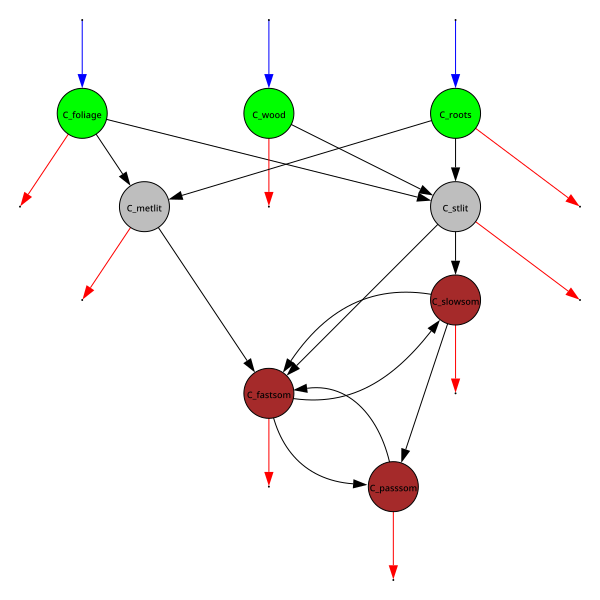

In [28]:
hr.igraph_part_plot(
    mvs_mm.get_StateVariableTuple(),
    in_fluxes,
    internal_fluxes,
    out_fluxes,
    part_dict,
)

In [25]:
mvs_mm.provided_mvar_types

frozenset({bgc_md2.models.BibInfo.BibInfo,
           bgc_md2.resolve.mvars.CompartmentalMatrix,
           bgc_md2.resolve.mvars.InputTuple,
           bgc_md2.resolve.mvars.NumericParameterization,
           bgc_md2.resolve.mvars.NumericSimulationTimes,
           bgc_md2.resolve.mvars.NumericStartValueDict,
           bgc_md2.resolve.mvars.StateVariableTuple,
           bgc_md2.resolve.mvars.TimeSymbol,
           bgc_md2.resolve.mvars.VegetationCarbonInputPartitioningTuple,
           bgc_md2.resolve.mvars.VegetationCarbonInputScalar,
           bgc_md2.resolve.mvars.VegetationCarbonStateVariableTuple})

In [26]:
#Now we can compute the vegetation cycling matrix
hr.compartmental_matrix_2(
    out_fluxes_veg,
    internal_fluxes_veg,
    mvs_mm.get_VegetationCarbonStateVariableTuple()
)

Matrix([
[-cr_foliage,        0,        0],
[          0, -cr_root,        0],
[          0,        0, -cr_wood]])

In [27]:
#Now we can compute the soil cycling matrix
hr.compartmental_matrix_2(
    out_fluxes_soil,
    internal_fluxes_soil,
    state_vector_soil
)

Matrix([
[      -cr_fastsom, f_slowsom2fastsom, f_passsom2fastsom],
[f_fastsom2slowsom,       -cr_slowsom,                 0],
[f_fastsom2passsom, f_slowsom2passsom,       -cr_passsom]])